# Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

# Load the dataset

In [2]:
df_stock = pd.read_csv('ETH-USD.csv')
df_stock.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
0,2017-11-09,2017,11,9,Thursday,45,2017-45,308.64,329.45,307.06,320.88,893249984,320.88,0.000000,320.880000,320.880000
1,2017-11-10,2017,11,10,Friday,45,2017-45,320.67,324.72,294.54,299.25,885985984,299.25,-0.067411,310.065000,310.065000
2,2017-11-11,2017,11,11,Saturday,45,2017-45,298.59,319.45,298.19,314.68,842300992,314.68,0.051555,311.603333,311.603333
3,2017-11-12,2017,11,12,Sunday,46,2017-46,314.69,319.15,298.51,307.91,1613479936,307.91,-0.021523,310.680000,310.680000
4,2017-11-13,2017,11,13,Monday,46,2017-46,307.02,328.42,307.02,316.72,1041889984,316.72,0.028606,311.888000,311.888000


In [3]:
df = pd.read_csv('ETH-USD_weekly_return_volatility.csv')
df.head(20)

,Year,Week_Number,mean_return,volatility,label
0,2017,45,-0.528333,5.966071,NaN
1,2017,46,1.477000,3.277433,NaN
2,2017,47,4.435143,6.128955,NaN
3,2017,48,0.016429,4.824342,NaN
4,2017,49,0.379857,4.076044,NaN
5,2017,50,6.191571,11.702181,NaN
6,2017,51,0.847143,9.056682,NaN
7,2017,52,0.069143,5.192851,NaN
8,2017,53,5.504000,0.000000,NaN
9,2018,0,5.571833,5.133605,NaN


# Train Naive Bayes Classifier based on year 1 (2020)

In [4]:
df_2020 = df[df.Year == 2020]
X = df_2020[['mean_return', 'volatility']]
Label = df_2020['label']
NB_classifier = GaussianNB().fit(X, Label)

# Confusion Matrix for year 2 (2021)

/tmp/ipykernel_76145/2174178801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['predicted'] = NB_classifier.predict(X_test)


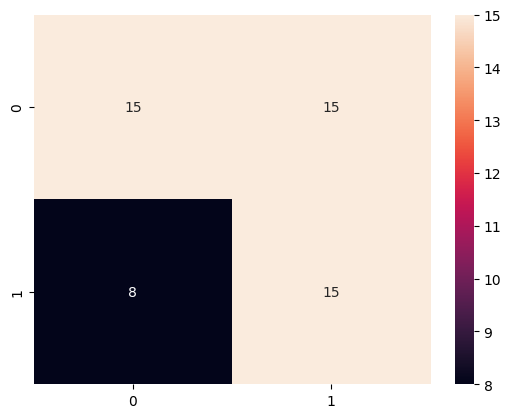

In [5]:
df_2021 = df[df.Year == 2021]
X_test, y_test = df_2021[['mean_return', 'volatility']], df_2021['label']
df_2021['predicted'] = NB_classifier.predict(X_test)

cf = confusion_matrix(y_test, df_2021['predicted'])
sns.heatmap(cf, annot=True)
plt.show()

# Calculating metrics

In [ ]:
tn, fp, fn, tp = cf.ravel()
TPR = tp / (tp + tn)
TNR = tn / (fn + tn)
print(f"TPR = {TPR} and TNR = {TNR}.")

TPR = 0.5 and TNR = 0.6521739130434783.
